In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
file_path = "C:/Users/Harsh/model training/predictive_maintenance_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df['date'] = pd.to_datetime(df['date'])

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Select numerical sensor metrics for anomaly detection
sensor_columns = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']
X = df[sensor_columns]


Number of anomalies detected: 1245


D:\coding\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


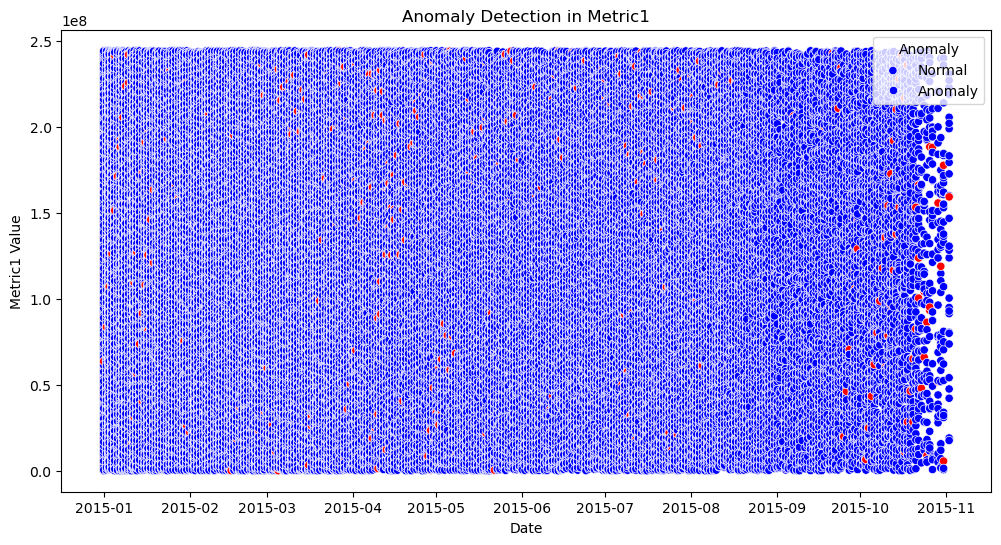

Anomaly detection completed. Results saved in 'anomalies_detected.csv'.


In [4]:
# Train Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)

# Identify anomalies (anomaly_score = -1 means an outlier)
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Count anomalies
num_anomalies = df['is_anomaly'].sum()
print(f"Number of anomalies detected: {num_anomalies}")

# Plot anomalies
def plot_anomalies():
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='date', y='metric1', hue='is_anomaly', palette={0: 'blue', 1: 'red'})
    plt.title("Anomaly Detection in Metric1")
    plt.xlabel("Date")
    plt.ylabel("Metric1 Value")
    plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
    plt.show()

plot_anomalies()

# Save anomalies to CSV
df[df['is_anomaly'] == 1].to_csv("anomalies_detected.csv", index=False)

print("Anomaly detection completed. Results saved in 'anomalies_detected.csv'.")
